In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [2]:
# Generate random stock data
np.random.seed(42)
num_assets = 4
num_obs = 1000

return_vec = np.random.randn(num_assets, num_obs)


In [3]:
# Calculate mean returns and covariance matrix
mean_returns = np.mean(return_vec, axis=1)
cov_matrix = np.cov(return_vec)


In [4]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility


In [5]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    p_returns, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_volatility


In [6]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))


In [7]:
initial_guess = num_assets * [1. / num_assets]
result = minimize(neg_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix), 
                  method='SLSQP', bounds=bounds, constraints=constraints)


In [8]:
optimal_weights = result.x
optimal_returns, optimal_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

print("Optimal Weights:", optimal_weights)
print("Expected Return:", optimal_returns)
print("Expected Volatility:", optimal_volatility)


Optimal Weights: [2.24626166e-01 7.11440779e-01 6.39330553e-02 7.02020907e-18]
Expected Return: 0.05511127253649197
Expected Volatility: 0.7368240841834124


Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.05624171969419751
Annualized Volatility: 0.7580212886419914


Minimum Volatility Portfolio Allocation

Annualized Return: 0.020369987451793182
Annualized Volatility: 0.48823320840742557


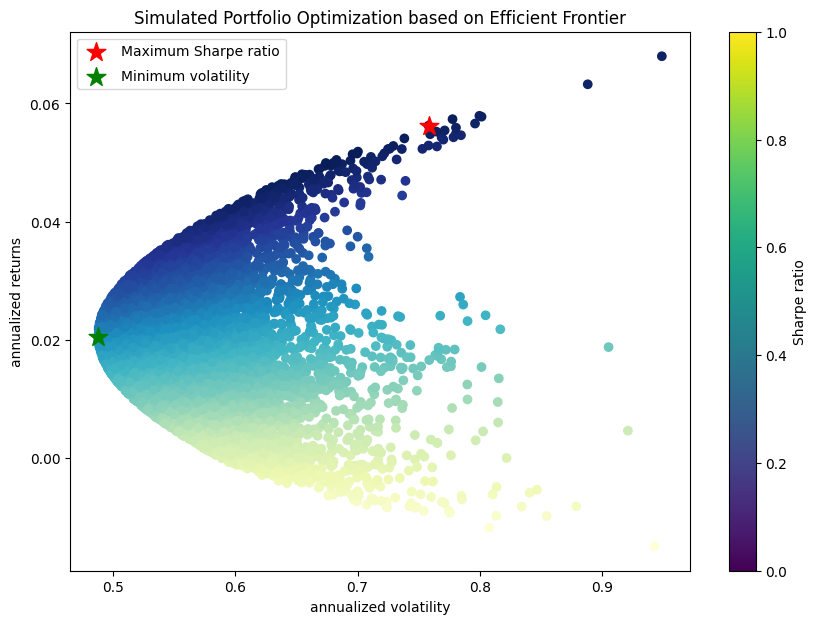

In [9]:
def plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0):
    results = np.zeros((3, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_volatility
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = weights_record[max_sharpe_idx]

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = weights_record[min_vol_idx]

    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", rp)
    print("Annualized Volatility:", sdp)
    print("\n")
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualized Return:", rp_min)
    print("Annualized Volatility:", sdp_min)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o')
    plt.scatter(sdp, rp, marker='*', color='r', s=200, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min, rp_min, marker='*', color='g', s=200, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.colorbar(label='Sharpe ratio')
    plt.legend(labelspacing=0.8)
    plt.show()

# Plot the efficient frontier
plot_efficient_frontier(mean_returns, cov_matrix)
